In [88]:
import pandas as pd
import numpy as np 

from sklearn import preprocessing
from matplotlib import pyplot as plt

from sklearn.preprocessing import Binarizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [36]:
df = pd.read_csv("Practice_File (2).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
dataFrame = df[['LotArea','SalePrice']]

In [6]:
dataFrame.sample(5)

,LotArea,SalePrice
1182,15623,745000
106,10800,100000
1416,11340,122500
784,6300,128000
543,4058,133000


In [13]:
Q1 = dataFrame['SalePrice'].quantile(0.25)
Q3 = dataFrame['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
IQR

84025.0

In [14]:
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)
upper_whisker,lower_whisker

(340037.5, 3937.5)

In [15]:
## maximum allaoable value
## cap is the upper allowable value
### capp -> 99% or 90% quantile Can be considered 
## floor the lower value can be conseidered in a column is 0.1% or 1 % or 10% quantile value 


In [19]:
print(dataFrame['SalePrice'].quantile(0.01))
print(dataFrame['SalePrice'].quantile(0.99))

61815.97
442567.01000000053


In [21]:
dataFrame['SalePrice'] = np.where(dataFrame['SalePrice']<61815.97,61815.97,dataFrame['SalePrice'])
dataFrame['SalePrice'] = np.where(dataFrame['SalePrice']>442567.01,442567.01,dataFrame['SalePrice'])

C:\Users\ishan\AppData\Local\Temp\ipykernel_21060\1051307823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['SalePrice'] = np.where(dataFrame['SalePrice']<61815.97,61815.97,dataFrame['SalePrice'])
C:\Users\ishan\AppData\Local\Temp\ipykernel_21060\1051307823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['SalePrice'] = np.where(dataFrame['SalePrice']>442567.01,442567.01,dataFrame['SalePrice'])


In [23]:
dataFrame['SalePrice'].max()

442567.01

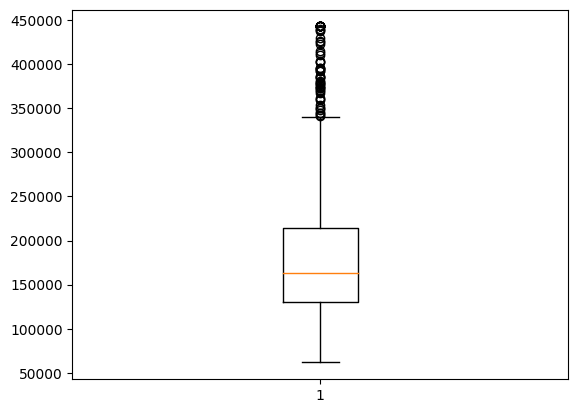

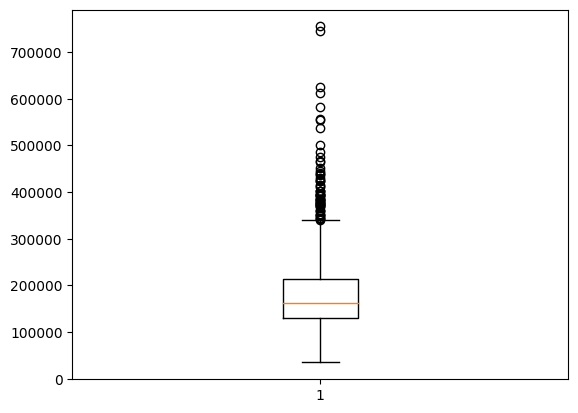

In [27]:
plt.boxplot(dataFrame['SalePrice'])
plt.show()
plt.boxplot(df['SalePrice'])
plt.show()

# Trimming

## removing outliers 

In [35]:
index = dataFrame[(dataFrame['SalePrice']>= 340037.5) |( dataFrame['SalePrice']<= 3937.5)].index
print(dataFrame.shape)
dataFrame['SalePrice'].drop(index,inplace=True)
print(dataFrame.shape)

(1460, 2)
(1460, 2)


C:\Users\ishan\AppData\Local\Temp\ipykernel_21060\3147403931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['SalePrice'].drop(index,inplace=True)


12.207687851233496

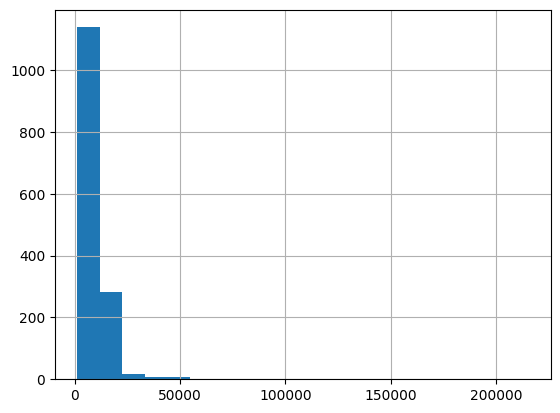

In [42]:
dataFrame['LotArea'].hist(bins=20)
dataFrame['LotArea'].skew()

In [44]:
dataFrame['Log_LotArea'] = dataFrame['LotArea'].map(lambda i:np.log(i) if i > 0 else 0)
print(dataFrame['LotArea'].skew())
print(dataFrame['Log_LotArea'].skew())

12.207687851233496
-0.1379938086958118


C:\Users\ishan\AppData\Local\Temp\ipykernel_21060\2169736466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['Log_LotArea'] = dataFrame['LotArea'].map(lambda i:np.log(i) if i > 0 else 0)


<AxesSubplot: >

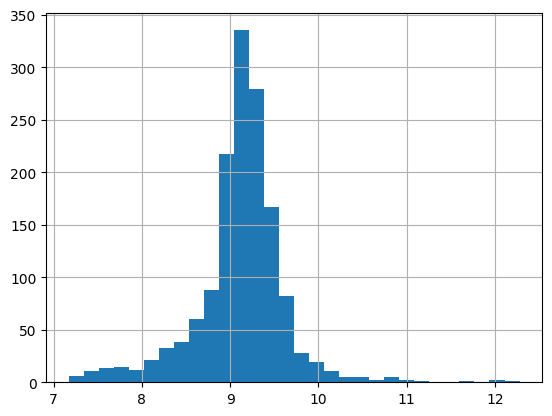

In [47]:
dataFrame['Log_LotArea'].hist(bins= 30)

# Discretization

In [49]:
## converting continous varibale to discrete form (or categorical form )
## scikit - learns Binarizer
## numpy digitize for creating three or more bins 

In [50]:
age =  np.array([[6],[12],[20],[36],[18],[65]])

In [59]:
binarizer = Binarizer(threshold=18)

In [68]:
binarizer.fit_transform(age).reshape(1,-1)

array([[0, 0, 1, 1, 0, 1]])

In [66]:
np.digitize(age,bins=[20,30,64]).reshape(1,-1)

array([[0, 0, 1, 2, 0, 3]], dtype=int64)

# Clustering 

In [69]:
## unsupervised, k - means, clustering, acclumerative , hang, dbscan, mean shift

In [72]:
features, _ = make_blobs(n_samples=50,
                        n_features=2,
                        centers=3,
                        random_state=1)

In [73]:
clusterer = KMeans(3,random_state=0)

In [74]:
clusterer.fit(features)

KMeans(n_clusters=3, random_state=0)

In [75]:
dataframe = pd.DataFrame(features,columns=['Feature_1','Feature_2'])


In [76]:
dataframe['group'] = clusterer.predict(features)

In [78]:
dataframe.sample(2)

,Feature_1,Feature_2,group
30,-7.735544,-7.775664,2
16,-0.197452,2.346349,1


In [81]:
dataframe['group'].value_counts()

2    17
1    17
0    16
Name: group, dtype: int64

# Predicting Missing Value

In [83]:
x = [[1,2,np.NAN],[np.nan,6,5],[8,8,7]]


In [84]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(x)

array([[1. , 2. , 6. ],
       [4.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [1]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])
SimpleImputer()
y = [[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp_mean.transform(y))

NameError: name 'SimpleImputer' is not defined

In [89]:
lb = preprocessing.LabelBinarizer()
lb.fit_transform(['yes','no','no','yes'])

array([[1],
       [0],
       [0],
       [1]])

In [90]:
lb.classes_

array(['no', 'yes'], dtype='<U3')

In [91]:
data_frame = pd.DataFrame({'X':['a','b','c'],'Y':['B','A','C'],'Z':[1,2,3]})

In [92]:
pd.get_dummies(data_frame,prefix=['colX','colY'])

,Z,colX_a,colX_b,colX_c,colY_A,colY_B,colY_C
0,1,1,0,0,0,1,0
1,2,0,1,0,1,0,0
2,3,0,0,1,0,0,1


In [93]:
## Ordinal variables

In [94]:
dataframe_ = pd.DataFrame({"Score":['Low','Low','Medium','Medium','High','Barely More than Medium']})

In [95]:
scale_mapper = {'Low':1,
               'Medium':2,
               'Barely More than Medium':3,
               'High':4}

In [96]:
dataframe_

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High
5,Barely More than Medium
